# Objetivo do projeto:🎯

Este notebook contempla a criação de um modelo preditivo para classificar a categoria de crédito (bons ou maus pagadores) de novos clientes de crédito, baseado em dados de clientes que solicitaram crédito a um banco alemão. 
Base "Credit" do Kaggle.
Fonte (adaptado): https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline

In [154]:
#importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Descritivo

1...............................................importação da base

In [155]:
pd.set_option('display.max_columns', None) #mostra todas as colunas
base_credit = pd.read_csv('Credit.csv')
base_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


2................................................Verificar distribuição de atributos

In [156]:
base_credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


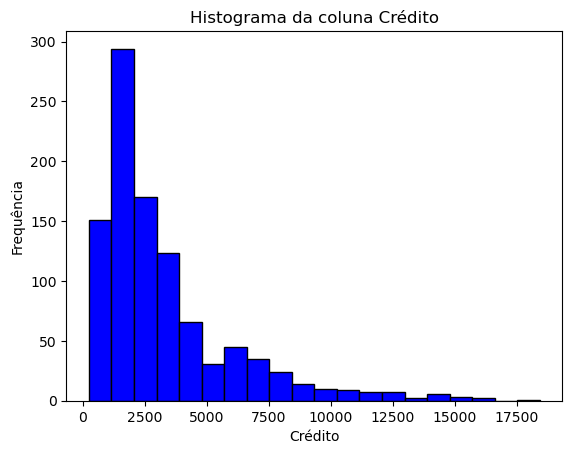

In [157]:
plt.hist(x = base_credit['credit_amount'],bins= 20, color='blue', edgecolor='black');
plt.xlabel('Crédito')
plt.ylabel('Frequência')
plt.title('Histograma da coluna Crédito')
plt.show()

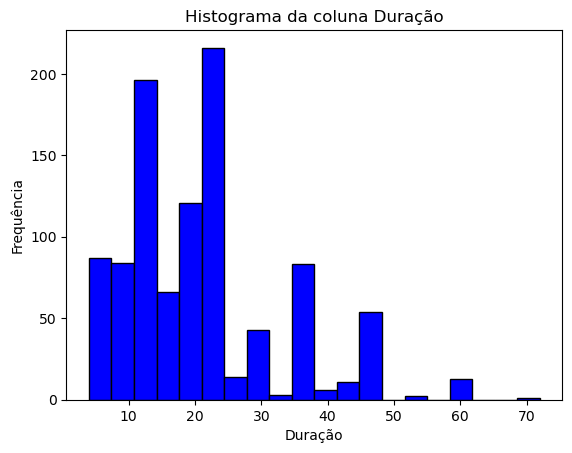

In [158]:
plt.hist(x = base_credit['duration'],bins= 20, color='blue', edgecolor='black');
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.title('Histograma da coluna Duração')
plt.show()

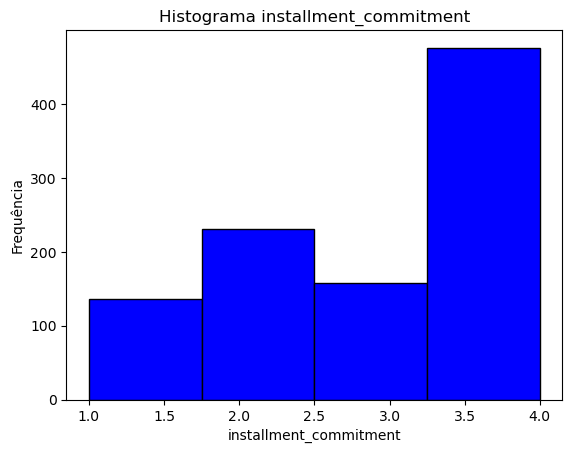

In [159]:
plt.hist(x = base_credit['installment_commitment'],bins= 4, color='blue', edgecolor='black');
plt.xlabel('installment_commitment')
plt.ylabel('Frequência')
plt.title('Histograma installment_commitment')
plt.show()

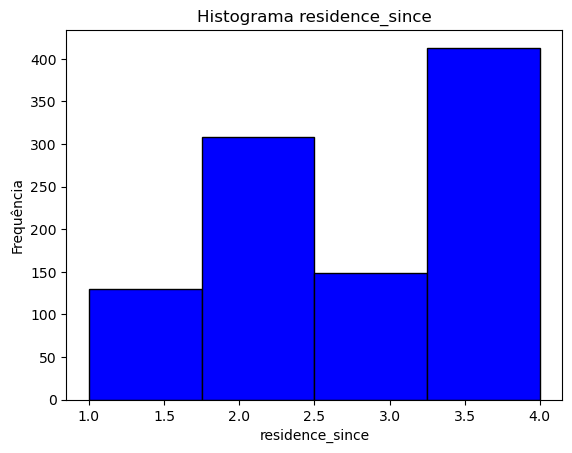

In [160]:
plt.hist(x = base_credit['residence_since'],bins= 4, color='blue', edgecolor='black');
plt.xlabel('residence_since')
plt.ylabel('Frequência')
plt.title('Histograma residence_since')
plt.show()

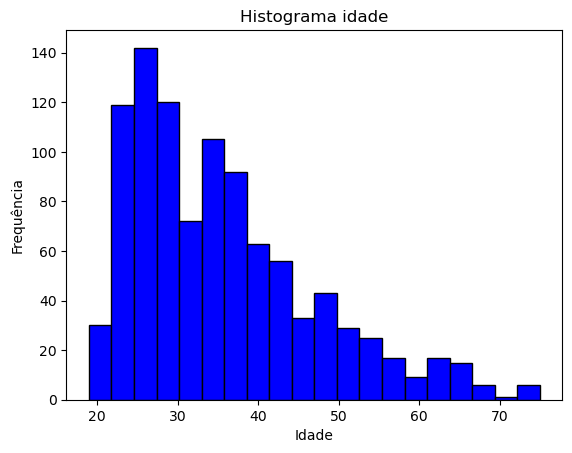

In [161]:
plt.hist(x = base_credit['age'],bins= 20, color='blue', edgecolor='black');
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma idade')
plt.show()

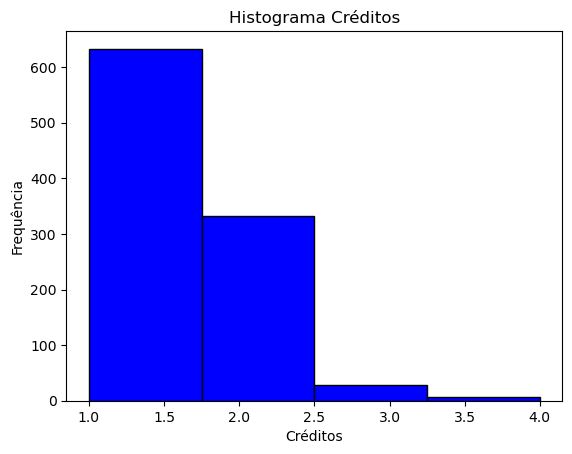

In [162]:
plt.hist(x = base_credit['existing_credits'],bins= 4, color='blue', edgecolor='black');
plt.xlabel('Créditos')
plt.ylabel('Frequência')
plt.title('Histograma Créditos')
plt.show()

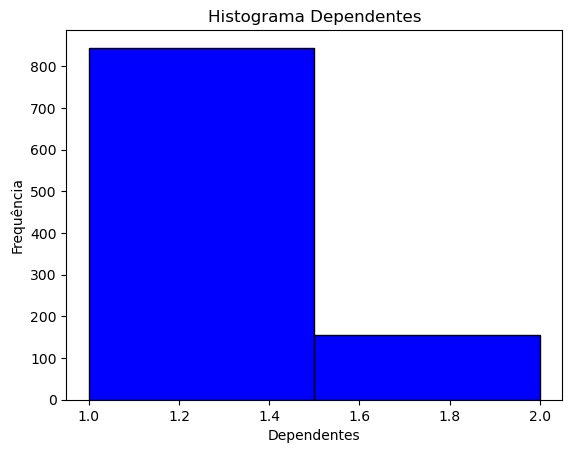

In [102]:
plt.hist(x = base_credit['num_dependents'],bins= 2, color='blue', edgecolor='black');
plt.xlabel('Dependentes')
plt.ylabel('Frequência')
plt.title('Histograma Dependentes')
plt.show()

In [164]:
#Distribuição de idade por categoria de crédito
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import warnings
from collections import Counter

df_good = base_credit.loc[base_credit["class"] == 'good']['age'].values.tolist()
df_bad = base_credit.loc[base_credit["class"] == 'bad']['age'].values.tolist()
df_age = base_credit['age'].values.tolist()

#primeiro gráfico
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Segundo gráfico
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Terceiro Gráfico
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Cirando grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Bom','Mau', 'Geral'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\thiag\anaconda3\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [174]:
#Crédito por idade


interval = (18, 25, 35, 60, 120)

cats = ['Estudante', 'Jovem', 'Adulto', 'Idoso']
base_credit["Age_cat"] = pd.cut(base_credit.age, interval, labels=cats)


df_good = base_credit[base_credit["class"] == 'good']
df_bad = base_credit[base_credit["class"] == 'bad']


trace0 = go.Box(
    y=df_good["credit_amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['credit_amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [207]:
#apaga a coluna age
base_credit = base_credit.drop('Age_cat', axis =1)
base_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,3,5,1736,3,1,3,0,2,4,2,31,1,1,1,2,1,0,1,1
996,2,30,3,2,3857,3,0,4,1,2,4,0,40,1,1,1,0,1,1,1,1
997,0,12,3,7,804,3,3,4,3,2,4,3,38,1,1,1,3,1,0,1,1
998,2,45,3,7,1845,3,0,4,3,2,4,1,23,1,0,1,3,1,1,1,0


In [175]:
#Distribuição por Tipo de Moradia
#Primeiro gráfico
trace0 = go.Bar(
    x = base_credit[base_credit["class"]== 'good']["housing"].value_counts().index.values,
    y = base_credit[base_credit["class"]== 'good']["housing"].value_counts().values,
    name='Good credit'
)

#Segundo gráfico
trace1 = go.Bar(
    x = base_credit[base_credit["class"]== 'bad']["housing"].value_counts().index.values,
    y = base_credit[base_credit["class"]== 'bad']["housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

3................................................Verificar desbalanceamento

In [176]:
round(base_credit['class'].value_counts(normalize=True)*100,2)

good    70.0
bad     30.0
Name: class, dtype: float64

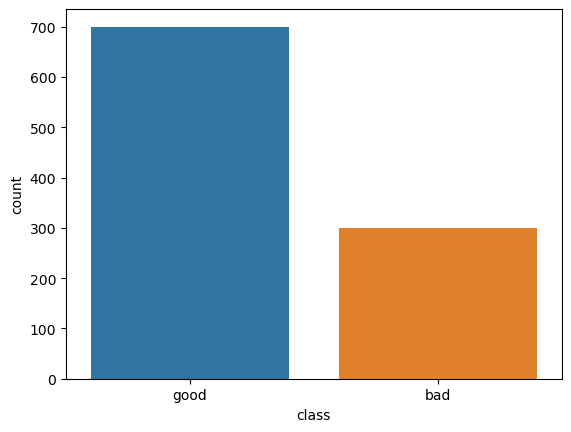

In [177]:
sns.countplot(x = base_credit["class"]);

4................................................Verificar valores nulos

In [178]:
#Contar valores nulos por atributo
base_credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
Age_cat                   0
dtype: int64

5................................................Verificar outliers

In [179]:
#Verificando Valores únicos
print(base_credit.nunique())
#Looking the data
print(base_credit.head())

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
Age_cat                     4
dtype: int64
  checking_status  duration                    credit_history  \
0              <0         6  'critical/other existing credit'   
1        0<=X<200        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3              <0        42                   'existing paid'   
4 

In [180]:
#documentação https://pyod.readthedocs.io/en/latest/#

from pyod.models.knn import KNN

In [181]:
#É preciso tratar dados NaN antes de executar o método
detector = KNN()
detector.fit(base_credit.iloc[:,[1,4,7,10,12,15,17]])


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [107]:
#Traz a avaliação se o ponto é outlier (1)
previsoes = detector.labels_
previsoes

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [182]:
#Contagem de outliers
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([900, 100], dtype=int64))

# Feature Engeneering

In [183]:
base_credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'Age_cat'],
      dtype='object')

6................................................Label Encoder

In [184]:
#Cria uma função que faz label enconding
def label_encoder_dataframe(df, columns_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('A lista possui colunas que não existem no Dataframe.')
                
    return df
    
#Definição dos parâmetros

colunas_a_codificar = ['checking_status','credit_history','purpose','savings_status','employment','personal_status', 'other_parties','property_magnitude', 'other_payment_plans','housing','job','own_telephone','foreign_worker','class']
label_encoder_dataframe(base_credit,colunas_a_codificar)
base_credit.head()
    

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Age_cat
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1,1,Idoso
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1,0,Estudante
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1,Adulto
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1,1,Adulto
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1,0,Adulto


<Axes: >

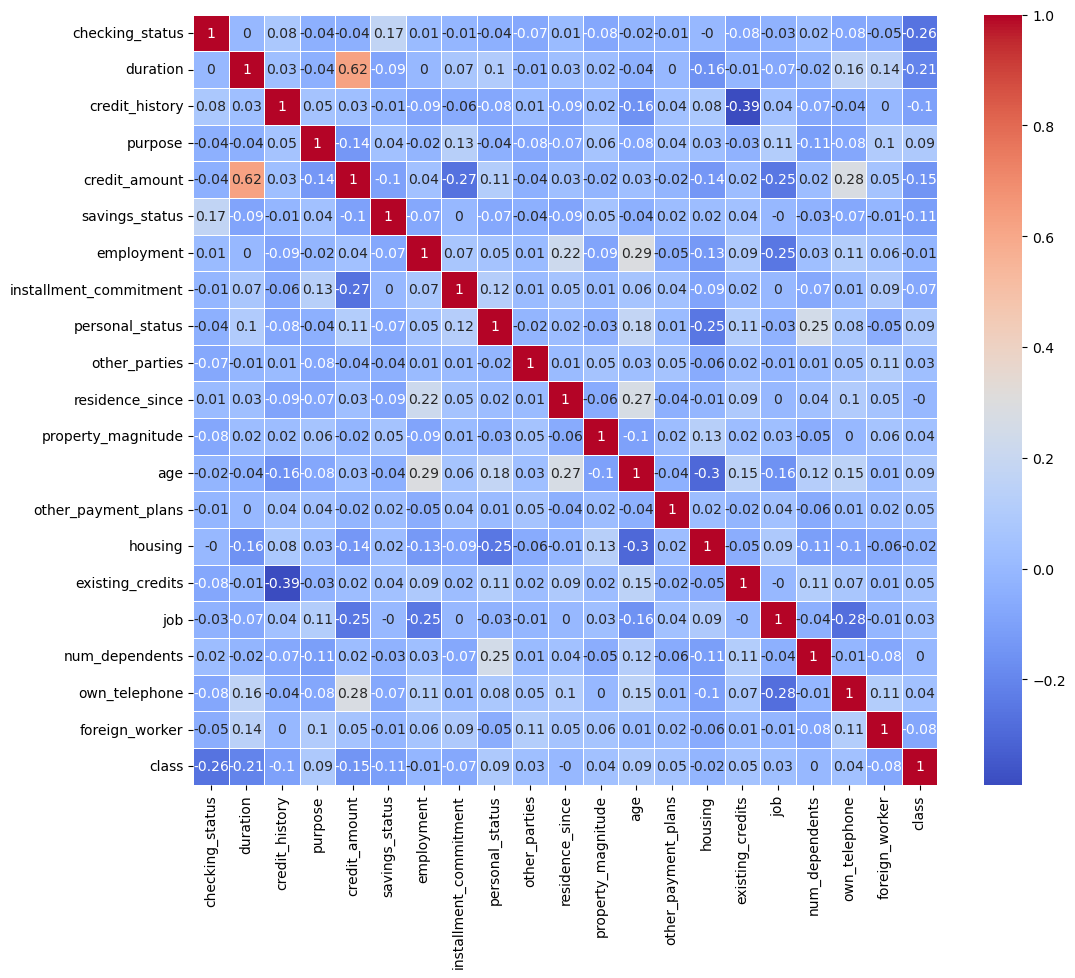

In [223]:
#Criando matriz de correlação
correlation_matrix = base_credit.corr().round(2) #round é o arredondamento

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data = correlation_matrix, annot= True,linewidths=.5, ax=ax, cmap='coolwarm')

7................................................Separação das Features

In [185]:
#Python trabalha com o intervalo aberto no fim da série
X_credit = base_credit.iloc[:,0:20].values
X_credit

array([[ 2,  6,  1, ...,  1,  1,  1],
       [ 1, 48,  3, ...,  1,  0,  1],
       [ 0, 12,  1, ...,  2,  0,  1],
       ...,
       [ 0, 12,  3, ...,  1,  0,  1],
       [ 2, 45,  3, ...,  1,  1,  1],
       [ 1, 45,  1, ...,  1,  0,  1]], dtype=int64)

In [186]:
y_credit = base_credit.iloc[:,20].values
y_credit

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

8................................................One Hot Encoding

In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [208]:
#Cria uma variavel transformada
onehotencoder_credit = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder ='passthrough') #colocar colunas transformadas no label encoder
X_credit = onehotencoder_credit.fit_transform(X_credit)
X_credit.shape

(1000, 74)

# Sobreamostragem com SMOTE

In [209]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_credit,y_credit)
X_over.shape, y_over.shape

((1400, 74), (1400,))

In [210]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([700, 700], dtype=int64))

# Divisão entre Treino e Teste

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, stratify=y_over, random_state=0)

In [212]:
X_train.shape, y_test.shape

((980, 74), (420,))

In [213]:
X_test.shape, y_test.shape

((420, 74), (420,))

# Padronização dos dados

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_over)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

# Criando uma função para executar modelos de machine learning

In [195]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

# Regressão Logística

AUC 0.8124036281179138

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       210
           1       0.76      0.73      0.75       210

    accuracy                           0.75       420
   macro avg       0.75      0.75      0.75       420
weighted avg       0.75      0.75      0.75       420


Roc Curve



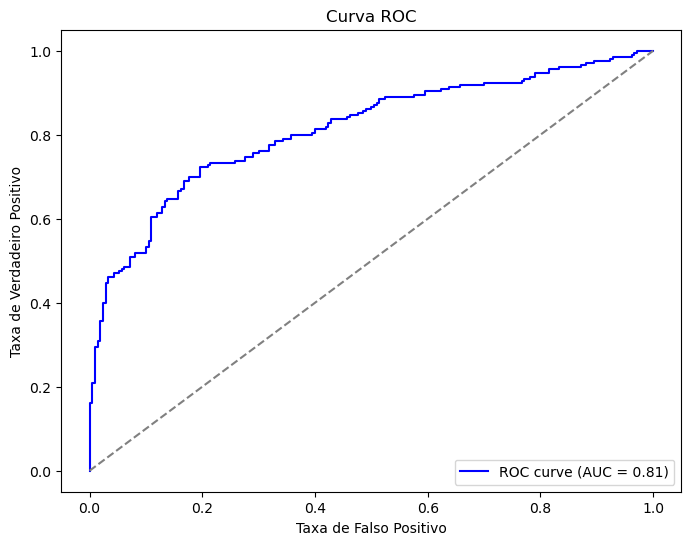

In [215]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

# KNN(K-Nearest Neighbors)

AUC 0.8373809523809523

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       210
           1       0.87      0.60      0.71       210

    accuracy                           0.75       420
   macro avg       0.78      0.75      0.75       420
weighted avg       0.78      0.75      0.75       420


Roc Curve



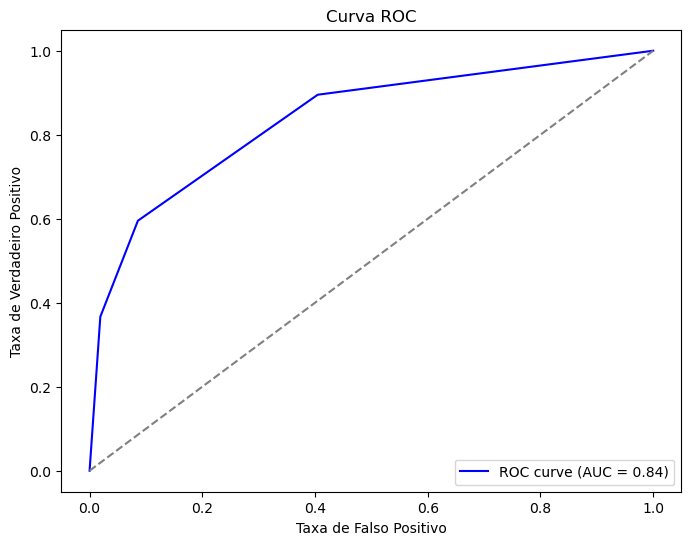

In [216]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

# Random Forest

AUC 0.8887074829931972

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       210
           1       0.80      0.83      0.81       210

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420


Roc Curve



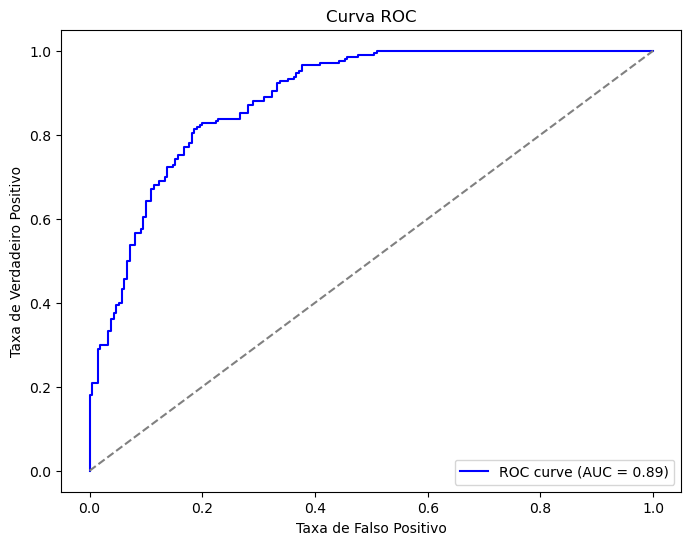

In [217]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators=100)
roda_modelo(modelo_random_forest)

In [78]:
#Testando parâmetros com Grid Search
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)


Melhores hiperparâmetros: {'max_depth': 10, 'n_estimators': 300}


AUC 0.8937414965986394

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       210
           1       0.78      0.85      0.81       210

    accuracy                           0.80       420
   macro avg       0.81      0.80      0.80       420
weighted avg       0.81      0.80      0.80       420


Roc Curve



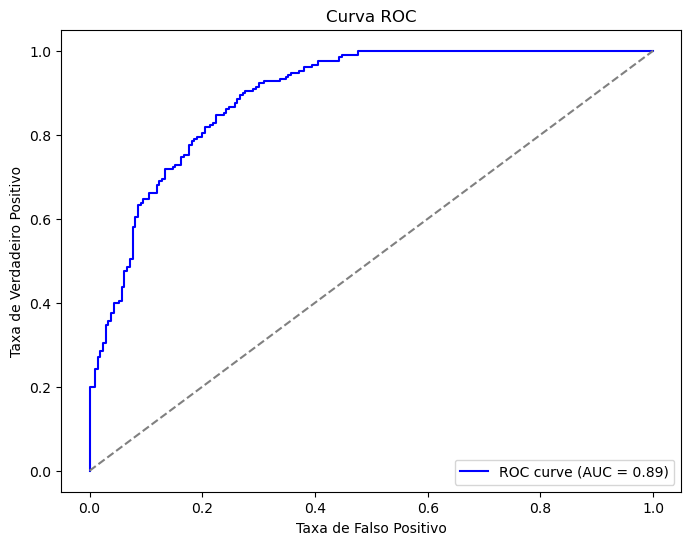

In [218]:
#Testando com melhores parâmetros
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=10, n_estimators=300)
roda_modelo(modelo_random_forest_gs)

# Naïve Bayes

AUC 0.7612358276643991

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       210
           1       0.73      0.75      0.74       210

    accuracy                           0.74       420
   macro avg       0.74      0.74      0.74       420
weighted avg       0.74      0.74      0.74       420


Roc Curve



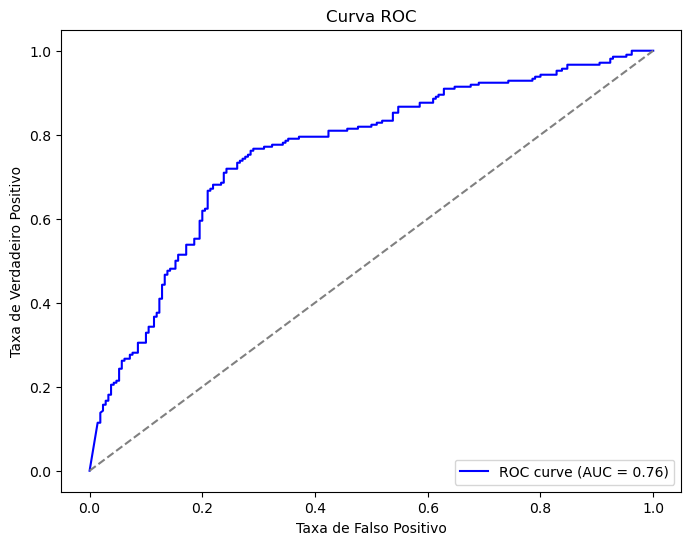

In [219]:
from sklearn.naive_bayes import GaussianNB 
modelo_naive = GaussianNB()
roda_modelo(modelo_naive)

# Algorítmo SVM

In [220]:
from sklearn.svm import SVC 
modelo_svc = SVC(kernel='rbf', random_state=1, C = 2.0)
modelo_svc.fit(X_train_escalonado, y_train)
previsoes = modelo_svc.predict(X_test_escalonado)


In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Precisão
accuracy_score(y_test,previsoes)

0.8071428571428572

In [203]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       210
           1       0.80      0.82      0.81       210

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



In [90]:
#Testando parâmetros com Grid Search
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {'tol': [0.001, 0.0001, 0.00001],
             'C': [1.0, 1.5, 2.0],
             'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)


Melhores hiperparâmetros: {'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}


In [221]:
#Testando com melhores parâmetros
modelo_svc = SVC(kernel='rbf', random_state=1, C = 2.0, tol = 0.001)
modelo_svc.fit(X_train_escalonado, y_train)
previsoes = modelo_svc.predict(X_test_escalonado)

In [222]:
#Precisão
accuracy_score(y_test,previsoes)

0.8333333333333334

In [206]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       210
           1       0.80      0.82      0.81       210

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



# Redes Neurais

Iteration 1, loss = 0.72612773
Iteration 2, loss = 0.64447753
Iteration 3, loss = 0.58609091
Iteration 4, loss = 0.54433158
Iteration 5, loss = 0.51092591
Iteration 6, loss = 0.48593819
Iteration 7, loss = 0.46532898
Iteration 8, loss = 0.44858989
Iteration 9, loss = 0.43313864
Iteration 10, loss = 0.41945803
Iteration 11, loss = 0.40646526
Iteration 12, loss = 0.39415053
Iteration 13, loss = 0.38232896
Iteration 14, loss = 0.37134127
Iteration 15, loss = 0.36029684
Iteration 16, loss = 0.34939464
Iteration 17, loss = 0.33830340
Iteration 18, loss = 0.32811669
Iteration 19, loss = 0.31804435
Iteration 20, loss = 0.30789582
Iteration 21, loss = 0.29793817
Iteration 22, loss = 0.28742803
Iteration 23, loss = 0.27765280
Iteration 24, loss = 0.26698578
Iteration 25, loss = 0.25781528
Iteration 26, loss = 0.24785043
Iteration 27, loss = 0.23878089
Iteration 28, loss = 0.22803072
Iteration 29, loss = 0.21865038
Iteration 30, loss = 0.20908540
Iteration 31, loss = 0.19963962
Iteration 32, los

Iteration 259, loss = 0.00074564
Iteration 260, loss = 0.00075876
Iteration 261, loss = 0.00075867
Iteration 262, loss = 0.00073853
Iteration 263, loss = 0.00071639
Iteration 264, loss = 0.00072689
Iteration 265, loss = 0.00071771
Iteration 266, loss = 0.00071576
Iteration 267, loss = 0.00070231
Iteration 268, loss = 0.00069338
Iteration 269, loss = 0.00068802
Iteration 270, loss = 0.00068085
Iteration 271, loss = 0.00068104
Iteration 272, loss = 0.00068200
Iteration 273, loss = 0.00065507
Iteration 274, loss = 0.00067598
Iteration 275, loss = 0.00065161
Iteration 276, loss = 0.00063863
Iteration 277, loss = 0.00065314
Iteration 278, loss = 0.00063228
Iteration 279, loss = 0.00064535
Iteration 280, loss = 0.00062825
Iteration 281, loss = 0.00061746
Iteration 282, loss = 0.00062358
Iteration 283, loss = 0.00060851
Iteration 284, loss = 0.00060972
Iteration 285, loss = 0.00060068
Iteration 286, loss = 0.00059649
Iteration 287, loss = 0.00058404
Iteration 288, loss = 0.00059610
Iteration 

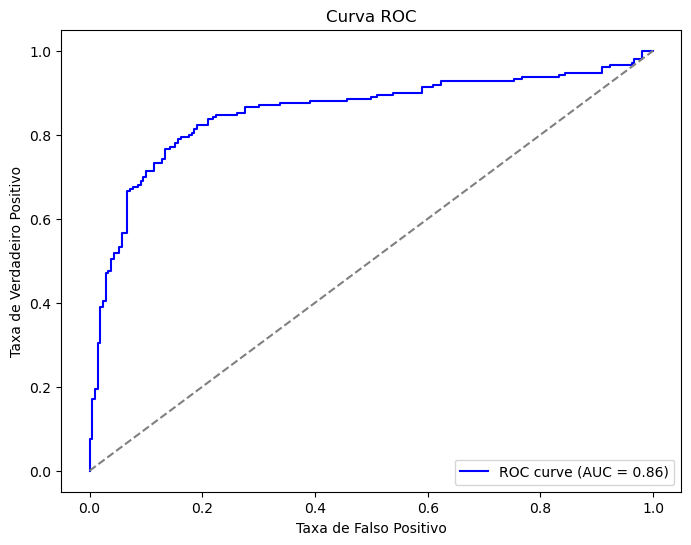

In [83]:
from sklearn.neural_network import MLPClassifier
modelo_redes_neurais = MLPClassifier(max_iter=1000, verbose=True,tol=0.0000100, solver='adam', hidden_layer_sizes = (55,55), activation = 'relu')
roda_modelo(modelo_redes_neurais)

